TASK 3: SALES PREDICTION

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import statsmodels.formula.api as smf
import seaborn as sbs

EXTRACTION OF DATA

In [2]:
sales_data=pd.read_csv("advertising.csv", header=0, sep=",")
print(sales_data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


CLEANING OF DATA

In [3]:
sales_data.dropna(axis=0, inplace=True)
print(sales_data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


INFROMATION ABOUT DATA

In [4]:
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [5]:
print(sales_data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


C:\Users\Ruchi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


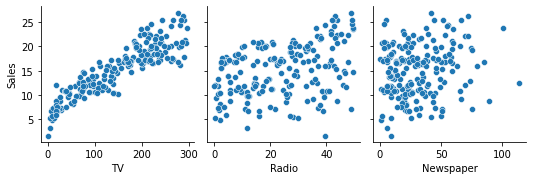

In [6]:
sbs.pairplot(sales_data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

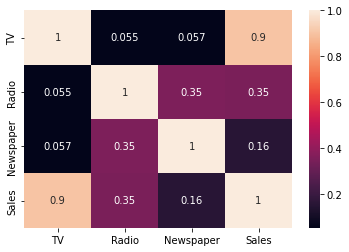

In [8]:
sbs.heatmap(sales_data.corr(), annot=True)
plt.show()

AS WE CAN SEE TV SALES ARE INCRESAES WITH THE INCREASE IN ADVERTISEMENT.

SO TV SALES ARE BIT DOMINATING AS COMPARED TO RADIO AND NEWSPAPER

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(sales_data[['TV']], sales_data[['Sales']], test_size=0.2, random_state=0)

In [10]:
print(x_train)

        TV
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[160 rows x 1 columns]


In [12]:
print(y_train)

     Sales
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[160 rows x 1 columns]


In [13]:
print(x_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0


In [14]:
print(y_test)

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    16.1
159   12.9
60     8.1
123   15.2
179   17.6
185   22.6
122   16.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     17.9
83    13.6
106    7.2


In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [18]:
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
model= lr.predict(x_test)

In [20]:
print(model)

[[10.92912965]
 [ 9.88399105]
 [12.08313684]
 [22.93189318]
 [16.42699412]
 [10.22148373]
 [ 7.63585439]
 [20.23195181]
 [ 8.45781235]
 [17.91849399]
 [21.38595901]
 [11.90894708]
 [15.68668762]
 [17.38503783]
 [11.32105662]
 [13.70527904]
 [21.62002651]
 [ 7.20037998]
 [11.22851831]
 [18.77855596]
 [22.81758114]
 [14.7994085 ]
 [16.6937222 ]
 [14.33127351]
 [10.07451111]
 [13.86313851]
 [16.17659633]
 [18.32130782]
 [19.35555956]
 [ 8.52857694]
 [10.85292163]
 [17.98925858]
 [22.44198446]
 [20.3190467 ]
 [ 7.88080875]
 [ 8.18019741]
 [10.40656035]
 [17.00399772]
 [10.88558221]
 [ 8.52313351]]


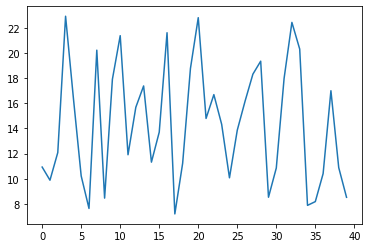

In [24]:
plt.plot(model)